In [90]:
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models 
from torchvision import transforms
from torchvision.models.feature_extraction import create_feature_extractor
from skimage.transform import resize

from sklearn.cluster import KMeans

In [180]:
# function converts image to binary and return edited image
def toBinary(image):
    # convert image to numpy array
    img_array = np.array(image)

    # define green line that we are targeting
    target_color = np.array([0, 170, 0])

    # binary mask where pixels matching the target color = True
    mask = np.all(img_array == target_color, axis=-1)
    
    # set pixels matching the target color to black and everything else to white
    img_array[mask] = [0, 0, 0]  # Black
    img_array[~mask] = [255, 255, 255]  # White

    # convert the NumPy array back to an image
    result_img = Image.fromarray(img_array)
    
    return result_img

In [182]:
ratedImgs = {}
for im_path in glob.glob("../../game2/assets/stim/*/*.png"):
    image_dir = im_path.split("stim/",1)[1]
    levelcomb = image_dir.split("/",1)[0].split("-",1)
    
    levelID = levelcomb[0]
    wind = levelcomb[1]
    imageID = "connect-" + im_path.split("connect-",1)[1]
    img = Image.open(im_path).convert("RGB")
    binarized = toBinary(img)
    ratedImgs[imageID] = binarized

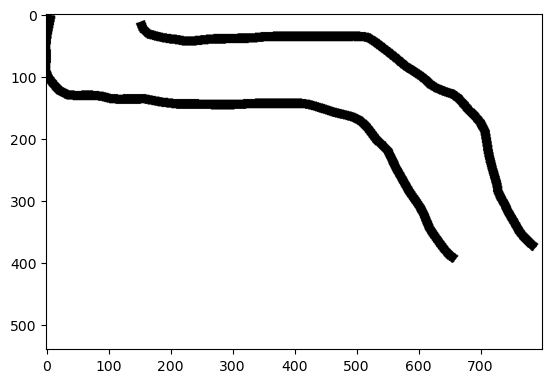

In [183]:
plt.imshow(ratedImgs["connect-F6C2C2975E2D47A29BB1DC4817243718_img16.png"])
plt.show()

# feature extraction from CLIP

# feature extraction from alexnet

In [17]:
alex = models.alexnet(pretrained=True)
alex

/Users/lo2069/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/lo2069/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/lo2069/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|████████████████████████████████████████| 233M/233M [00:07<00:00, 32.6MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

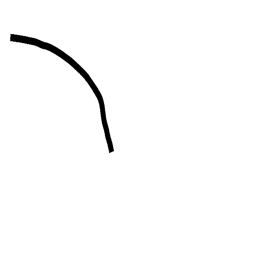

In [215]:
# binImg = "connect-F6C2C2975E2D47A29BB1DC4817243718_img16.png"
# binImg = "connect-D04F6CB04CD04617BC6683C605093ECB_img28.png"
binImg = "connect-9D77BFB713434C959919E681D5AA3E24_img11.png"
testimg = ratedImgs[binImg]
testimg.resize((256,256))


In [216]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(244), #double check this isn't removing data
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img_transformed = preprocess(testimg)
img_transformed.shape

torch.Size([3, 244, 244])

In [217]:
batch = img_transformed.unsqueeze(0)
batch

tensor([[[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2

In [155]:
alex.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

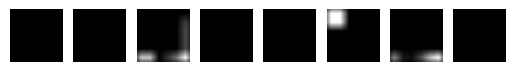

In [218]:
#0th layer
# alex.eval().features[0]

#1st layer
# alex.eval().features[3]

#2nd layer
# alex.eval().features[6]

#3rd layer
# alex.eval().features[8]

#4th layer
# alex.eval().features[10]

input_tensor = batch
output_tensor = alex.features(input_tensor)
# output_tensor.shape

# for name, layer in alex.named_children():
#     print(name)
#     print(layer)

plots = []
fig, axs = plt.subplots(1,8)
for i in range(8):
    layer_index = i+4
    features = output_tensor[:, layer_index, :, :]

    features_np = features.detach().cpu().numpy()
    resized = resize(features_np[0], (256,256), mode='constant')
    plots.append(resized)
    axs[i].imshow(plots[i], cmap='gray')
    axs[i].axis('off')
    
#     plt.imshow(resized, cmap='gray')  # Assuming batch size is 1, change if batch size is different
#     plt.colorbar()  # Add color bar for reference
#     plt.title('Feature Map Visualization')

fig.savefig(f'featuremap/'+binImg, bbox_inches='tight')  # Save the visualization as an image


In [38]:
## from elizabeth's code using keras
# from keras.applications.vgg16 import VGG16, preprocess_input
# from keras.preprocessing import image
# from keras.models import Model

# def extract_features(img_path, model):
#     img = image.load_img(img_path, target_size=(224, 224))
#     img_array = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))
#     features = model.predict(img_array)

#     return features.flatten()

## adaptation to torchvision functions
def extract_feats(imageID):
    # define preprocessing
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244), #double check this isn't removing data
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # pull up image + preprocess
    img = ratedImgs[imageID]
    img_tensor = transform(img)
    return(img_tensor)
    
    # extract features
#     features = model(img_tensor)
    
#     return features.squeeze().np()

In [9]:
## resnet50
m = models.resnet50()

## vgg16
# m = models.vgg16(pretrained=True)
print(m)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 